In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)

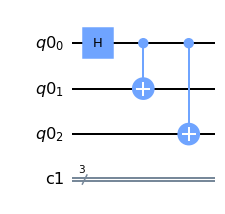

In [3]:
qc.h(q[0])
qc.cx(q[0],q[1])
qc.cx(q[0],q[2])
qc.draw('mpl')

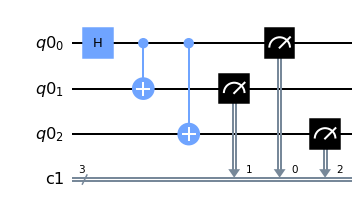

In [4]:
for i in range(3):
    qc.measure(q[i],c[i])
qc.draw('mpl')

In [5]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'111': 493, '000': 531}


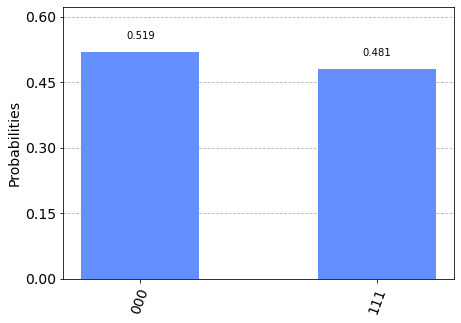

In [6]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [8]:
from qiskit import IBMQ
IBMQ.save_account('5862d7c7d83f3fb5ce87620b3efb3831b7d691451c70ff0fd467f19b7cc6b1075a12456d82ee20e6d97e5846db1ea57498c64a6f04285272aeb049ade5ec7d70')

configrc.store_credentials:WARNING:2022-01-24 10:56:08,945: Credentials already present. Set overwrite=True to overwrite.


In [10]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
provider = IBMQ.get_provider('ibm-q')

In [12]:
qcomp = provider.get_backend('ibmq_lima')

In [13]:
qc_compiled = transpile(qc,qcomp)

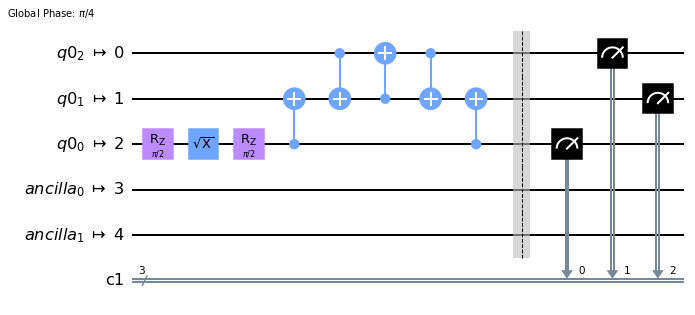

In [14]:
qc_compiled.draw('mpl')

In [15]:
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [16]:
job = qcomp.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'000': 472, '001': 6, '010': 22, '011': 65, '100': 22, '101': 35, '110': 25, '111': 377}
